In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
df = pd.read_csv('data/Gold_price.csv')

In [6]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [9]:
#Delete clarity column
df.drop('clarity', axis=1, inplace=True)

In [10]:
df.head()

,id,carat,cut,color,depth,table,x,y,z,price
0,0,1.52,Premium,F,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,62.6,59.0,7.65,7.61,4.77,14453


In [11]:
#dependent and independent data
X=df.drop(['price'],axis=1)
y=df['price']


In [12]:
X.head()

,id,carat,cut,color,depth,table,x,y,z
0,0,1.52,Premium,F,62.2,58.0,7.27,7.33,4.55
1,1,2.03,Very Good,J,62.0,58.0,8.06,8.12,5.05
2,2,0.70,Ideal,G,61.2,57.0,5.69,5.73,3.50
3,3,0.32,Ideal,G,61.6,56.0,4.38,4.41,2.71
4,4,1.70,Premium,G,62.6,59.0,7.65,7.61,4.77


In [13]:
y.head()


0    13619
1    13387
2     2772
3      666
4    14453
Name: price, dtype: int64

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:
num_features=X.select_dtypes(exclude="object").columns
categorical_features=X.select_dtypes(include="object").columns

In [16]:
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

In [17]:
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,categorical_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [18]:
X = preprocessor.fit_transform(X)#apply column transformer on X i.e your input.

In [19]:
X.shape

(193573, 19)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((154858, 19), (38715, 19))

In [21]:
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse = mean_squared_error(true, predicted)#mean squared error
  rmse = np.sqrt(mean_squared_error(true, predicted))#root mean squared error
  r2_square = r2_score(true, predicted)#r2squared error.
  return mae, rmse, r2_square

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)
  model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
  model_list.append(list(models.keys())[i])
  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

Model performance for Training set
- Root Mean Squared Error: 1132.2854
- Mean Absolute Error: 699.4234
- R2 Score: 0.9214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1121.9276
- Mean Absolute Error: 695.3484
- R2 Score: 0.9221


Model performance for Training set
- Root Mean Squared Error: 1132.4759
- Mean Absolute Error: 699.0444
- R2 Score: 0.9213
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1122.1816
- Mean Absolute Error: 695.1133
- R2 Score: 0.9221


Model performance for Training set
- Root Mean Squared Error: 1132.2793
- Mean Absolute Error: 699.3243
- R2 Score: 0.9214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1121.9307
- Mean Absolute Error: 695.2344
- R2 Score: 0.9221


Model performance for Training set
- Root Mean Squared Error: 886.9733
- Mean Absolute Error: 503.2489
- R2 Score: 0.9518
----------------------------------
Model 

c:\Users\HRISHAB\Documents\mlproject2\Gold_price_prediction\venv\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Model performance for Training set
- Root Mean Squared Error: 894.7079
- Mean Absolute Error: 513.9434
- R2 Score: 0.9509
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 983.9422
- Mean Absolute Error: 551.1949
- R2 Score: 0.9401


Model performance for Training set
- Root Mean Squared Error: 917.7645
- Mean Absolute Error: 526.6511
- R2 Score: 0.9483
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 973.6566
- Mean Absolute Error: 548.3146
- R2 Score: 0.9413


Model performance for Training set
- Root Mean Squared Error: 1585.3626
- Mean Absolute Error: 1142.4136
- R2 Score: 0.8459
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1584.3643
- Mean Absolute Error: 1139.3545
- R2 Score: 0.8447




In [23]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"])

,Model Name,R2_Score
8,AdaBoost Regressor,0.844661
4,Decision Tree,0.876904
1,Lasso,0.922071
2,Ridge,0.922106
0,Linear Regression,0.922107
3,K-Neighbors Regressor,0.927436
5,Random Forest Regressor,0.937140
6,XGBRegressor,0.940089
7,CatBoosting Regressor,0.941335


In [24]:
lin_model=LinearRegression()
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.92


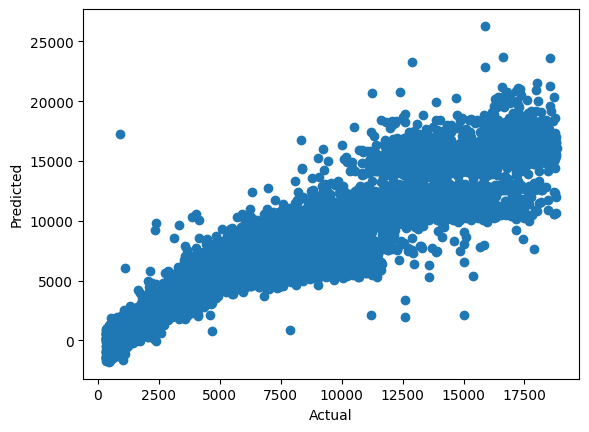

In [25]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');